In [1]:
import numpy as np
import pandas as pd

In [2]:
sterio_hearts="diabetes.csv"
d_data=pd.read_csv(sterio_hearts)

In [3]:
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1, 'Correlation Heat Map')

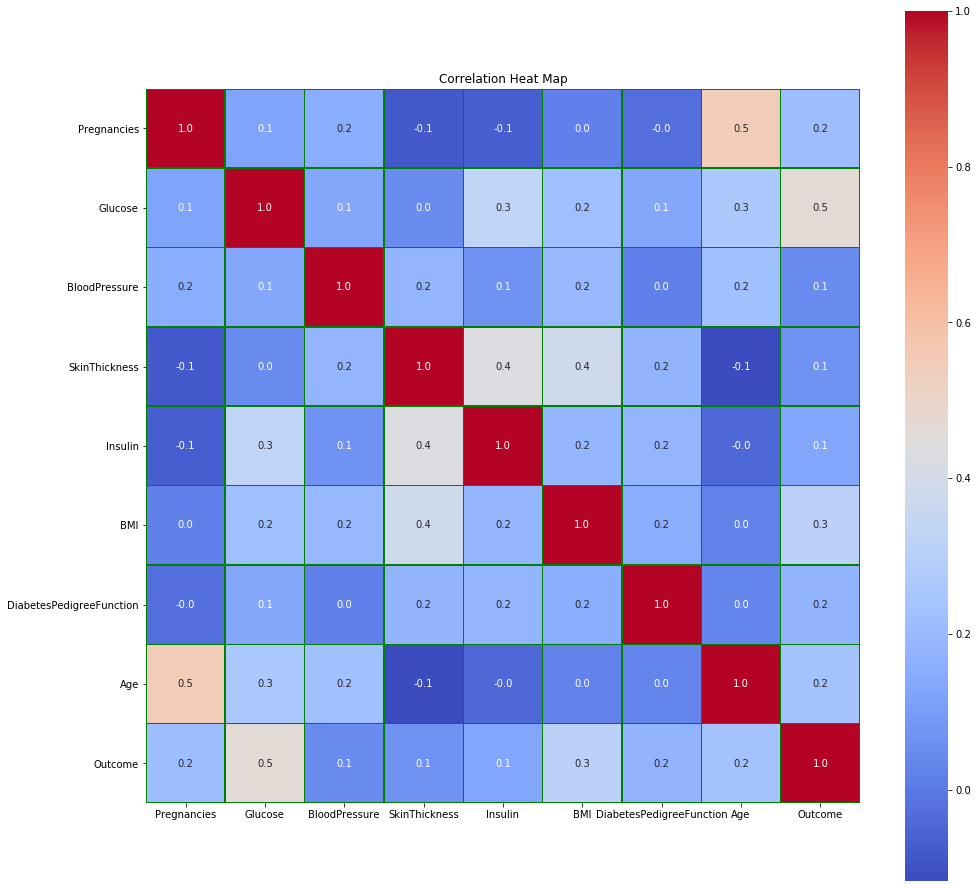

In [19]:
##importing requirments

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 16))
sns.heatmap(d_data.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f', square = True, annot = True,cmap="coolwarm",linecolor = "green")
plt.title('Correlation Heat Map')

## thus glucose and BMI an be considered as most relaiable acpect in the dataset for the outcome to be positive

In [6]:
#checking the 0 value availabity in BMI column
d_data.loc[d_data['BMI']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [7]:
#### its noticed that the BMI value is 0 for many thus it is theoritically not possible thus dropping
d_data.drop(d_data[d_data.BMI==0].index,inplace = True)

In [8]:
#ready to train
# Feeding input features to X and output (outcome) to y
X = d_data.drop("Outcome", axis = 1)
Y = d_data["Outcome"]

In [9]:
## creating X and Y numpy araay to make it ready for dataset splitiing for test and train
X = np.array(X)
Y = np.array(Y)

In [10]:
#spliting data i am using test train split from sklearn, thus importing it
from sklearn.model_selection import train_test_split

In [11]:
# spliting the dataset into 80-20 % partition
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

In [12]:
#checking the shape to confirm the split
print("shape of X_train : ",X_train.shape)
print("shape of X_test  : ",X_test.shape)
print("shape of Y_train : ",Y_train.shape)
print("shape of Y_test  : ",Y_test.shape)

shape of X_train :  (605, 8)
shape of X_test  :  (152, 8)
shape of Y_train :  (605,)
shape of Y_test  :  (152,)


In [13]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
model = lgr.fit(X_train,Y_train)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
y_pred = lgr.predict(X_test)
print("\n -------------------------predicted value----------\n")
print(y_pred)
print("\n -------------------------test value----------\n")
print(Y_test)


 -------------------------predicted value----------

[0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0]

 -------------------------test value----------

[1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0]


In [15]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model, X_train, Y_train, cv=5)
amvalue=np.mean(cvs)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [16]:
print("thus the accuracy of the model is:-",amvalue*100)

thus the accuracy of the model is:- 79.50413223140495
